In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [89]:
%matplotlib inline 

In [90]:
#load dataset and look at the data
loan_data= pd.read_csv('/Users/johnnycarrillo/Desktop/Project 4/Loan-Approval-Prediction-Model/Resources/loan_approval_dataset.csv')
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [91]:
#dropping the loan_id
loan_data.drop(['loan_id'], axis = 1, inplace = True)

In [92]:
#checking data type information
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [93]:
# Check for leading/trailing whitespaces in the column names
loan_data.columns = loan_data.columns.str.strip()


## Exploratory_Data_Analysis

<Figure size 800x600 with 0 Axes>

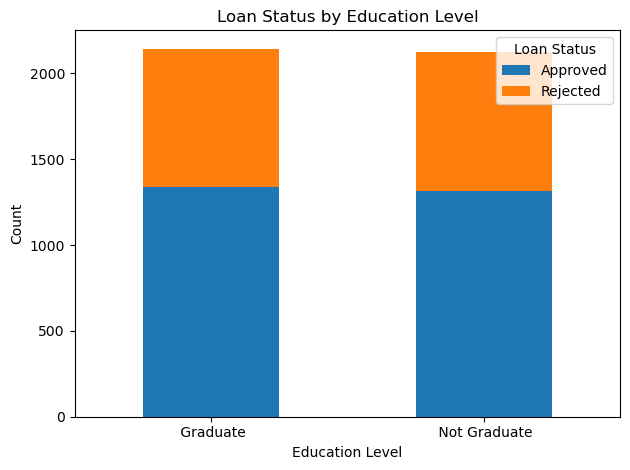

In [94]:
#grouping data by education level and sum of approval status 
if 'education' in loan_data and 'loan_status' in loan_data:
    #creating a new variable to create a groupby from education_level
    education_level_loan_approval= loan_data.groupby(["education", "loan_status"]).size().unstack()


    plt.figure(figsize=(8, 6))
    education_level_loan_approval.plot(kind='bar', stacked=True)
    plt.title('Loan Status by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right', labels=['Approved', 'Rejected'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

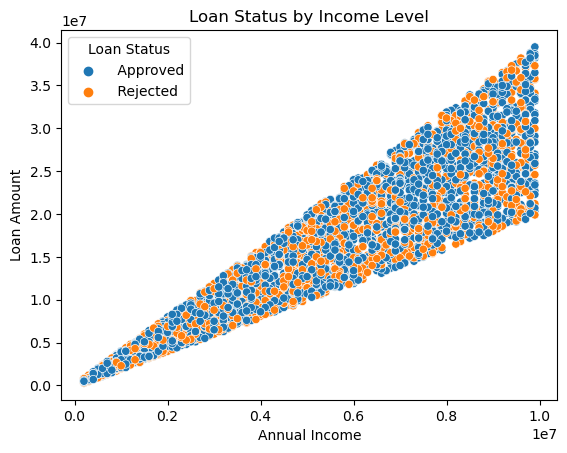

In [95]:
sns.scatterplot(data=loan_data, x='income_annum', y='loan_amount', hue='loan_status')

plt.title('Loan Status by Income Level')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount') 
plt.legend(title='Loan Status')
plt.show()

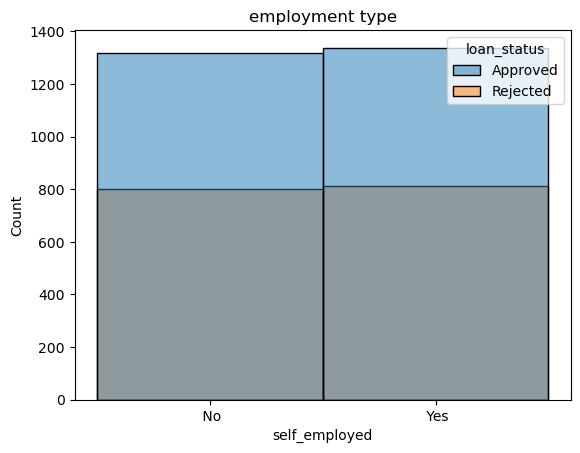

In [122]:
#reviewing the difference of self_employment effect on loan_status
sns.histplot(data=loan_data,x='self_employed',bins=2,hue='loan_status')
plt.title('employment type')
plt.show()

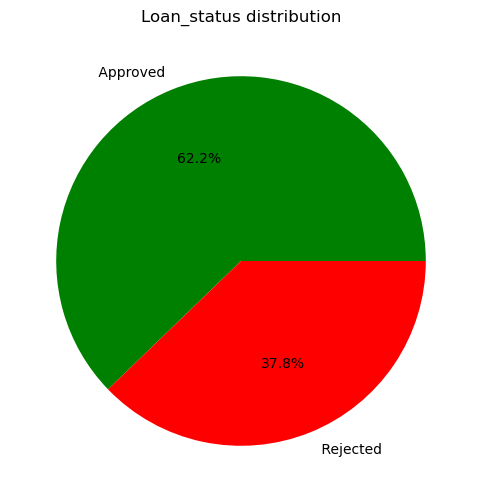

In [97]:
approval_rejection_counts = loan_data['loan_status'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(approval_rejection_counts, labels=approval_rejection_counts.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Loan_status distribution')
plt.show()

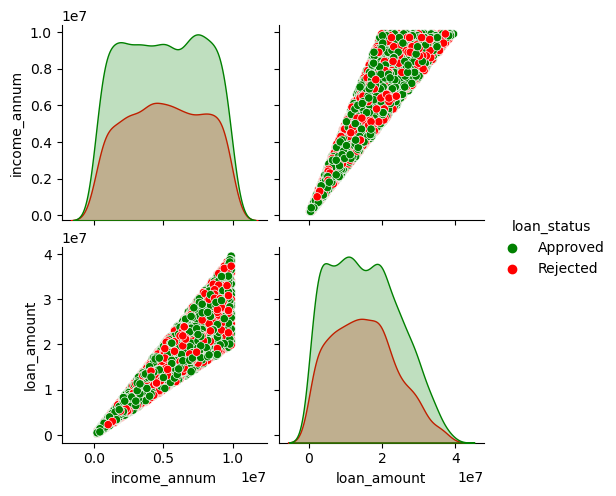

In [121]:
# Select features and target
numerical_features = ["income_annum", "loan_amount"]
target_feature = "loan_status"

# Strip whitespace from 'loan_status' column
loan_data['loan_status'] = loan_data['loan_status'].str.strip()

# Filter the data to include only the selected features
data_for_pair_plot = loan_data[[*numerical_features, target_feature]]

# Create a pair plot with color-coded points based on 'loan_status'
sns.pairplot(data_for_pair_plot, hue=target_feature, palette={"Approved": "g", "Rejected": "r"})
plt.show()

## Decision Tree Model

In [98]:
#creating an X variable 
X = loan_data.drop("loan_status", axis=1)
y = loan_data["loan_status"]

# Encode categorical variables
X = pd.get_dummies(X, columns=["education", "self_employed"])

## Split the Data

In [99]:
#Spliting the data into training and testing sets to evaluate the model's performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Create and Train the Decision Tree Model

In [100]:
# Initializing the DecisionTreeClassifier and fit it to the training data
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## Make Predictions

In [101]:
y_pred = decision_tree.predict(X_test)

## Evaluating the model 

In [102]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.9754098360655737
              precision    recall  f1-score   support

    Approved       0.98      0.98      0.98       536
    Rejected       0.97      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

Confusion Matrix:
[[527   9]
 [ 12 306]]


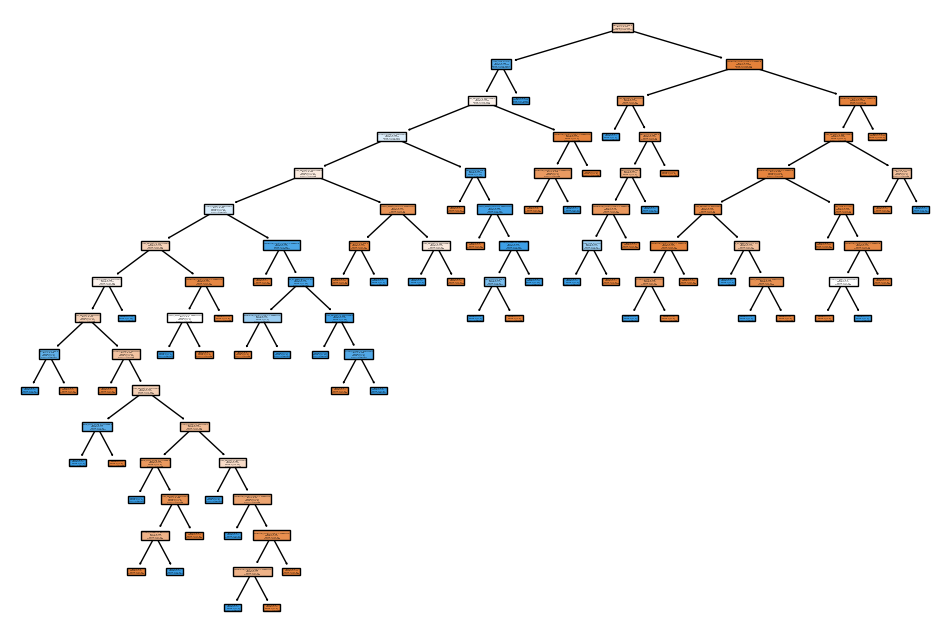

In [103]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=["Approved", "Rejected"], filled=True)
plt.show()


## Random Forest Machine Model

In [104]:
# Assuming 'loan_data' is your DataFrame
X = loan_data.drop("loan_status", axis=1)
y = loan_data["loan_status"]

# Encode categorical variables
X = pd.get_dummies(X, columns=["education", "self_employed"])



## split data

In [105]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create and Train the Random Forest Model

In [106]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Make Predictions

In [107]:
y_pred = random_forest.predict(X_test)


## Evaluate the Model:

In [108]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.9824355971896955
              precision    recall  f1-score   support

    Approved       0.99      0.99      0.99       536
    Rejected       0.98      0.97      0.98       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Confusion Matrix:
[[529   7]
 [  8 310]]


## KNeighbors model

In [109]:
# Assuming 'loan_data' is your DataFrame
X = loan_data.drop("loan_status", axis=1)
y = loan_data["loan_status"]

# Encode categorical variables
X = pd.get_dummies(X, columns=["education", "self_employed"])


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [111]:
# Apply standard scaling to the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [112]:
k = 8 # You can choose the number of neighbors (k) as per your preference
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=8)

In [113]:
y_pred = knn_classifier.predict(X_test)


/Users/johnnycarrillo/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [114]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.8899297423887588
              precision    recall  f1-score   support

    Approved       0.89      0.93      0.91       536
    Rejected       0.88      0.81      0.85       318

    accuracy                           0.89       854
   macro avg       0.89      0.87      0.88       854
weighted avg       0.89      0.89      0.89       854

Confusion Matrix:
[[501  35]
 [ 59 259]]
